In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import joblib

In [3]:
crop = pd.read_csv("Crop_recommendation.csv")

In [4]:
print("\n===== First 10 Rows of Dataset =====")
display(crop.head(10)) 


===== First 10 Rows of Dataset =====


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [5]:
crop.shape

(2200, 8)

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
crop.duplicated().sum()

0

In [9]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
crop_numeric = crop.select_dtypes(include=['number'])
(crop_numeric.corr())


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

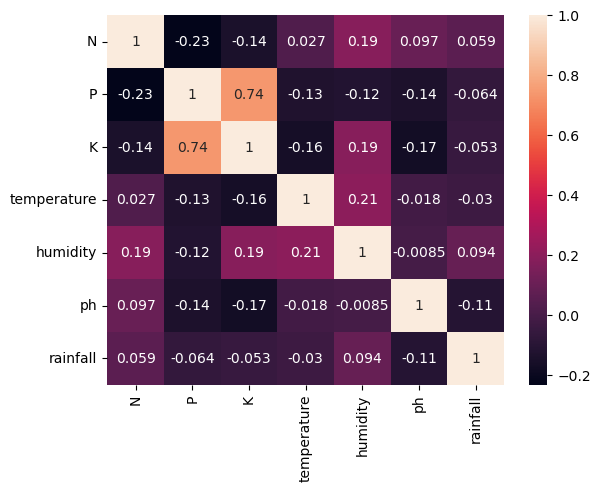

In [12]:
import seaborn as sns
sns.heatmap(crop_numeric.corr(), annot=True, cbar=True)

In [14]:
crop_counts = crop['label'].value_counts().reset_index()
crop_counts.columns = ["Crop", "Count"]
print("\n===== Crop Count Table =====")
display(crop_counts)



===== Crop Count Table =====


,Crop,Count
0,rice,100
1,maize,100
2,jute,100
3,cotton,100
4,coconut,100
5,papaya,100
6,orange,100
7,apple,100
8,muskmelon,100
9,watermelon,100


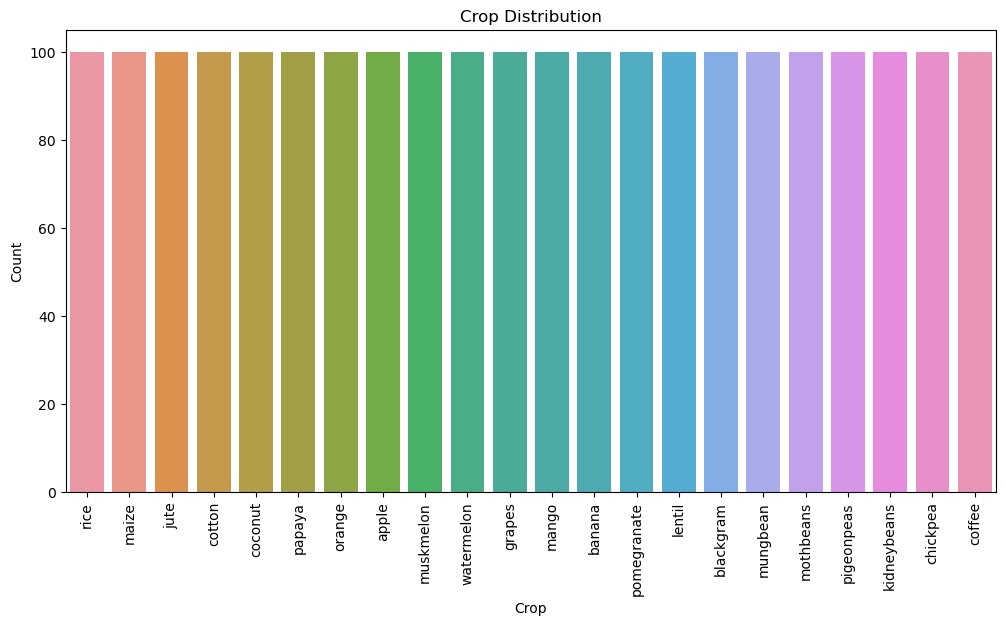

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Crop", y="Count", data=crop_counts)
plt.xticks(rotation=90)
plt.title("Crop Distribution")
plt.show()

In [12]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


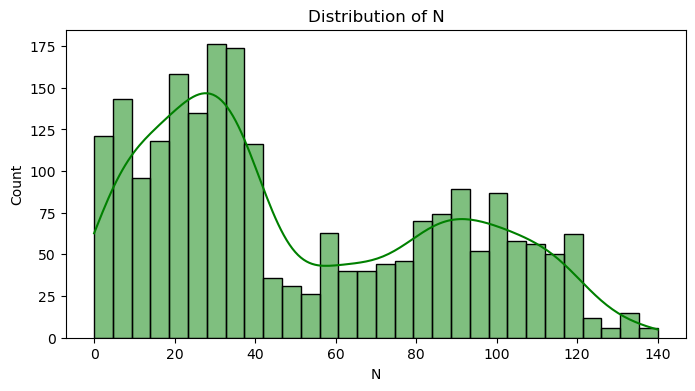

C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


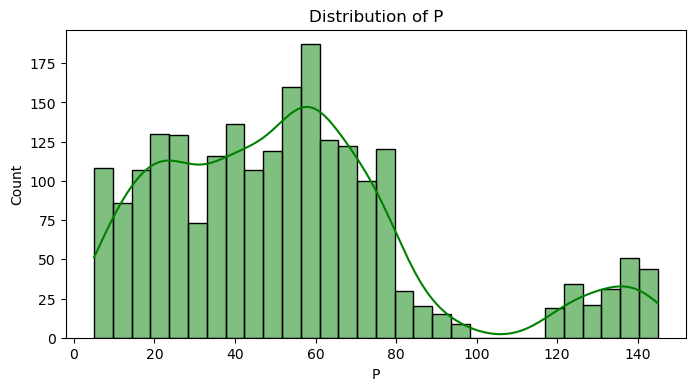

C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


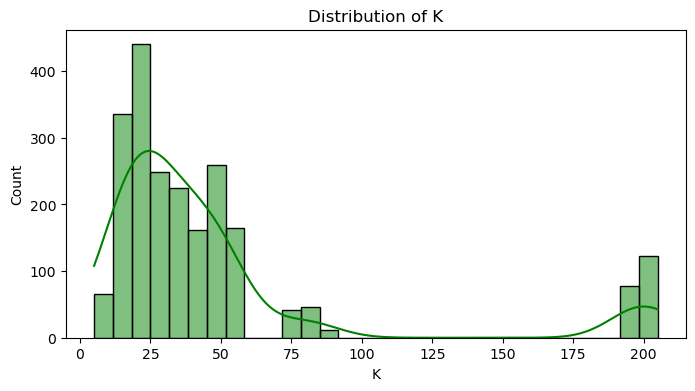

C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


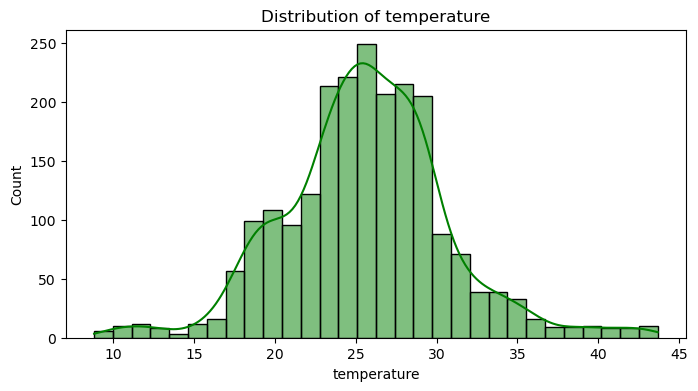

C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


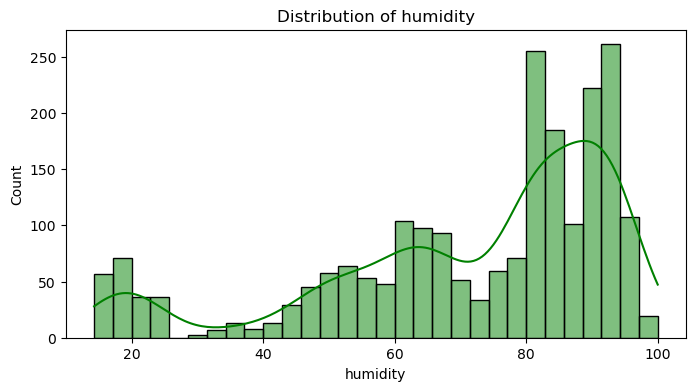

C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


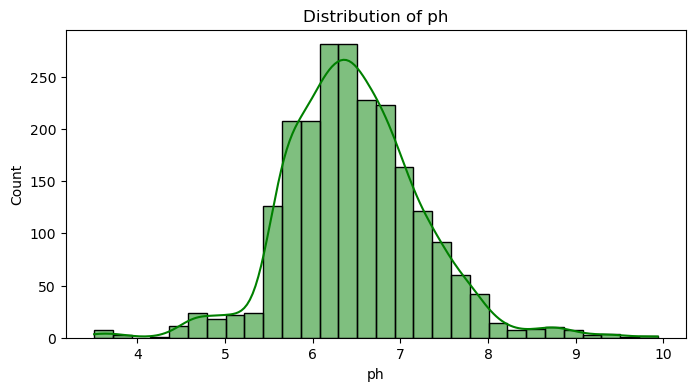

C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


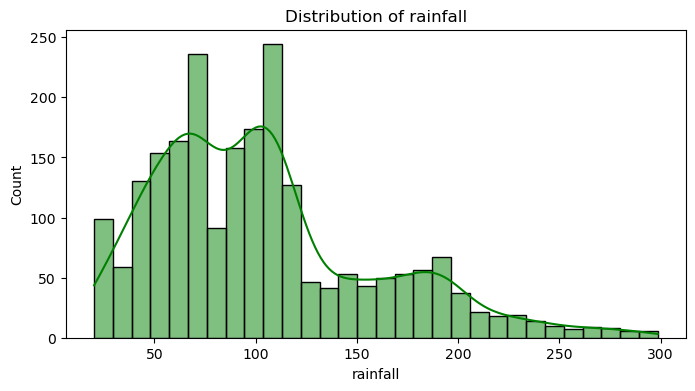

In [16]:
for col in crop.drop('label', axis=1).columns.tolist():
    plt.figure(figsize=(8, 4))
    sns.histplot(crop[col], kde=True, bins=30, color="green")
    plt.title(f"Distribution of {col}")
    plt.show()

In [17]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [19]:
# Encode labels (convert crop names to numbers)
le = LabelEncoder()
crop['label_encoded'] = le.fit_transform(crop['label'])

In [20]:
# Save the label encoder for future use
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [21]:
# Crop Mapping Table
crop_dict = dict(zip(le.transform(le.classes_), le.classes_))
crop_mapping_df = pd.DataFrame(list(crop_dict.items()), columns=["Encoded Label", "Crop Name"])
print("\n===== Crop Mapping Table =====")
display(crop_mapping_df)


===== Crop Mapping Table =====


,Encoded Label,Crop Name
0,0,apple
1,1,banana
2,2,blackgram
3,3,chickpea
4,4,coconut
5,5,coffee
6,6,cotton
7,7,grapes
8,8,jute
9,9,kidneybeans


In [22]:
# Separate features (X) and target (y)
X = crop.drop(['label', 'label_encoded'], axis=1)
y = crop['label_encoded']

In [23]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [24]:
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for future predictions
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [25]:
# Train XGBoost model
xgb = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
# Predictions
y_pred = xgb.predict(X_test_scaled)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")


Model Accuracy: 0.99



===== Classification Report =====


,precision,recall,f1-score,support
apple,1.000000,1.000000,1.000000,20.000000
banana,1.000000,1.000000,1.000000,20.000000
blackgram,0.952381,1.000000,0.975610,20.000000
chickpea,1.000000,1.000000,1.000000,20.000000
coconut,1.000000,1.000000,1.000000,20.000000
coffee,1.000000,1.000000,1.000000,20.000000
cotton,1.000000,1.000000,1.000000,20.000000
grapes,1.000000,1.000000,1.000000,20.000000
jute,0.952381,1.000000,0.975610,20.000000
kidneybeans,1.000000,1.000000,1.000000,20.000000



Model Accuracy: 0.99


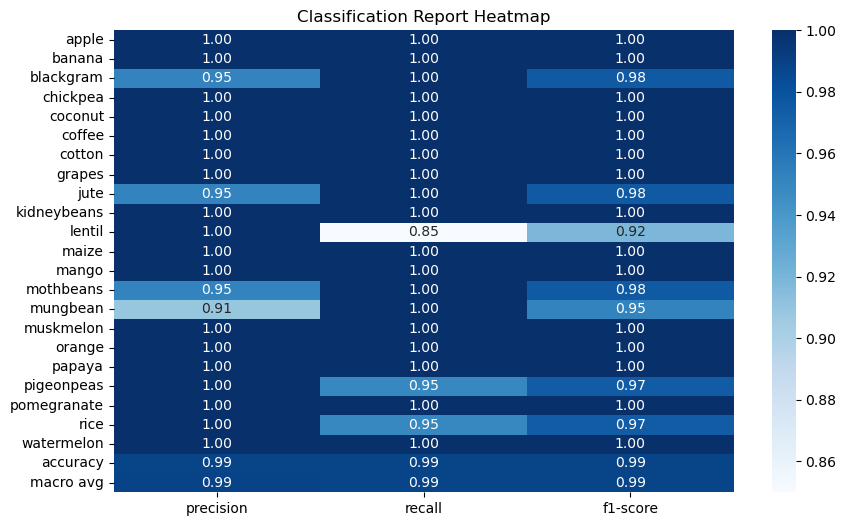

In [41]:
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("\n===== Classification Report =====")
display(report_df)

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report Heatmap")
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
plt.show()

<Figure size 1200x1000 with 0 Axes>

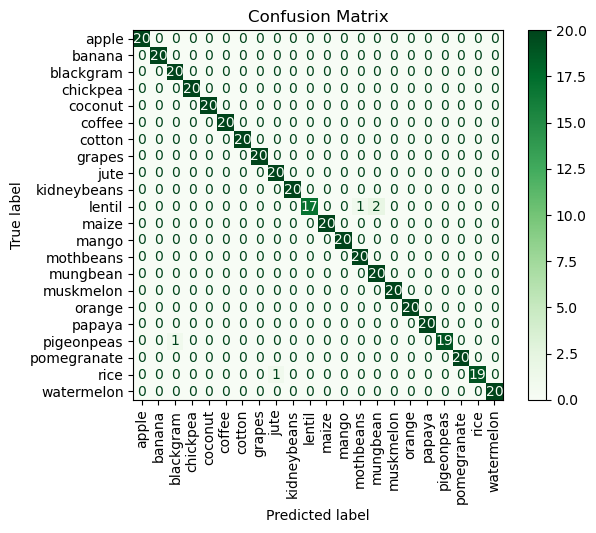

In [30]:
plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay.from_estimator(xgb, X_test_scaled, y_test, display_labels=le.classes_, cmap="Greens", xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()

In [42]:
# Save in all formats
joblib.dump(xgb, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
xgb.save_model("crop_model.json")  

print("Best model saved in multiple formats:")
print("- best_model.pkl (joblib/pickle format)")
print("- crop_model.json (XGBoost JSON format)")
print("- scaler.pkl (scaler object)")


Best model saved in multiple formats:
- best_model.pkl (joblib/pickle format)
- crop_model.json (XGBoost JSON format)
- scaler.pkl (scaler object)


In [43]:
def predict_crop():
    print("\n🌱 Enter the following parameters for crop prediction:")
    
    # Define expected ranges for each feature
    features = [
        ('Nitrogen (N)', 0, 140),
        ('Phosphorus (P)', 5, 145),
        ('Potassium (K)', 5, 205),
        ('Temperature (°C)', 9, 43),
        ('Humidity (%)', 15, 99),
        ('pH', 3.5, 9.9),
        ('Rainfall (mm)', 21, 298)
    ]
    
    input_values = []
    for feature in features:
        while True:
            try:
                value = float(input(f"{feature[0]} ({feature[1]}-{feature[2]}): "))
                if feature[1] <= value <= feature[2]:
                    input_values.append(value)
                    break
                else:
                    print(f"❌ Please enter a value between {feature[1]} and {feature[2]}")
            except ValueError:
                print("❌ Invalid input! Please enter a number.")
    
    # Convert to DataFrame (in correct feature order)
    input_df = pd.DataFrame([input_values], columns=X.columns)
    
    # Scale input
    input_scaled = scaler.transform(input_df)
    
    # Predict crop
    pred_num = xgb.predict(input_scaled)[0]
    pred_name = le.inverse_transform([pred_num])[0]
    
    print(f"\n✅ Recommended Crop: {pred_name}")

# Example usage
predict_crop()


🌱 Enter the following parameters for crop prediction:
Nitrogen (N) (0-140): 67
Phosphorus (P) (5-145): 87
Potassium (K) (5-205): 98
Temperature (°C) (9-43): 30.5
Humidity (%) (15-99): 80
pH (3.5-9.9): 5.1
Rainfall (mm) (21-298): 160

✅ Recommended Crop: jute
